# Handling missing values using all techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data

In [ ]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

In [ ]:
df.isnull().sum() # Number of missing values in every feature

In [ ]:
df.isnull().mean()#Percentage of missing data

In [ ]:
df[df['Age'].isnull()]

## 1. Mean / Median/ Mode

In [ ]:
median = df.Age.median()
median

In [ ]:
def impute_na(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [ ]:
impute_na(df,'Age',median)
df.head()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## 2. Random Sample Imputation

In [20]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [21]:
def impute_random_na(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    
    # Assigns actual age features to new random age
    df[variable+"_Random"] = df[variable]
    
    # this drops all NAN values and replaces them with a random values from the age column.
    df_random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state= 0)
    
    # index of Age column and df_random_sample is matched.
    # To merge df_random_sample and original null values from Age feature their indexes should match.
    df_random_sample.index = df[df[variable].isnull()].index
    
    # we are assigning all random values to Age and Age_Random which are NAN originally.
    df.loc[df[variable].isnull(), variable+"_Random"] = df_random_sample

In [22]:
median = df.Age.median()

impute_random_na(df,"Age",median)

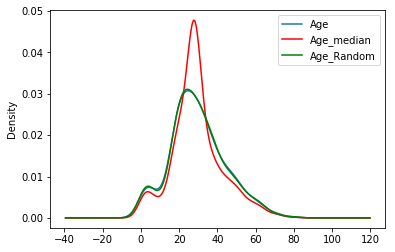

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_Random.plot(kind='kde', ax=ax, color='Green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## 3. capturing NAN values with a new feature

In [24]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
# It is nothing but the indicator or lable to check whether values are changed at given variable.
df["Age_NAN"] = np.where(df["Age"].isnull(),1,0)

In [26]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [27]:
df.Age.median()

28.0

In [28]:
df["Age"] = df["Age"].fillna(df.Age.median())

In [30]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## 4. End of Distribution Imputation